In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

def safelog(x):
    return(np.log(x + 1e-100))

In [78]:
data_set = pd.read_csv("hw02_data_set_images.csv", delimiter=',', header=None).to_numpy()
labels = pd.read_csv("hw02_data_set_labels.csv", delimiter=',', header=None).to_numpy().reshape(195,)

A_train = data_set[:25]
B_train = data_set[39:64]
C_train = data_set[78:103]
D_train = data_set[117:142]
E_train = data_set[156:181]

A_test = data_set[25:39]
B_test = data_set[64:78]
C_test = data_set[103:117]
D_test = data_set[142:156]
E_test = data_set[181:195]

x_train = np.concatenate((A_train, B_train, C_train, D_train, E_train))
x_test  = np.concatenate((A_test, B_test, C_test, D_test, E_test))

y_train_char = np.concatenate((labels[:25], labels[39:64], labels[78:103], labels[117:142], labels[156:181]))
y_test_char = np.concatenate((labels[25:39], labels[64:78], labels[103:117], labels[142:156], labels[181:195]))

y_train = np.array([ord(char) - 64 for char in y_train_char]).astype(int)
y_test = np.array([ord(char) - 64 for char in y_test_char]).astype(int)

N = x_train.shape[0]
K = 5

In [79]:
pcd_A = A_train.sum(axis=0)/N
pcd_B = B_train.sum(axis=0)/N
pcd_C = C_train.sum(axis=0)/N
pcd_D = D_train.sum(axis=0)/N
pcd_E = E_train.sum(axis=0)/N

pcd = np.stack((pcd_A, pcd_B, pcd_C, pcd_D, pcd_E)).T

priors = np.array([1/5 for x in range(K)])

In [80]:
def score_A(X):
    return np.sum(X*safelog(pcd[:,0]) + (1 - X)*safelog(1 - pcd[:, 0])) + safelog(priors[0])

def score_B(X):
    return np.sum(X*safelog(pcd[:,1]) + (1 - X)*safelog(1 - pcd[:, 1])) + safelog(priors[1])

def score_C(X):
    return np.sum(X*safelog(pcd[:,2]) + (1 - X)*safelog(1 - pcd[:, 2])) + safelog(priors[2])

def score_D(X):
    return np.sum(X*safelog(pcd[:,3]) + (1 - X)*safelog(1 - pcd[:, 3])) + safelog(priors[3])

def score_E(X):
    return np.sum(X*safelog(pcd[:,4]) + (1 - X)*safelog(1 - pcd[:, 4])) + safelog(priors[4])

def predict(X):
    return np.argmax([score_A(X), score_B(X), score_C(X), score_D(X), score_E(X)]) + 1

In [81]:
y_pred = np.apply_along_axis(predict, 1, x_train)
confusion_matrix = pd.crosstab(y_pred, y_train, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   1   1   1
3         0   0  23   0   0
4         0   0   0  24   0
5         0   0   1   0  24


In [82]:
y_pred_test = np.apply_along_axis(predict, 1, x_test)
confusion_matrix_test = pd.crosstab(y_pred_test, y_test, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix_test)

y_truth  1   2  3   4   5
y_pred                   
1        9   0  0   0   0
2        1  11  2   3   2
3        0   0  7   0   0
4        4   3  1  11   0
5        0   0  4   0  12


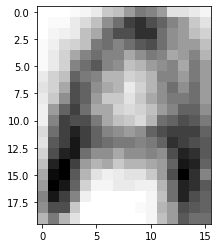

In [83]:
p_A = pcd[:,0].reshape((16,20))
plt.imshow(p_A.T, cmap='Greys')

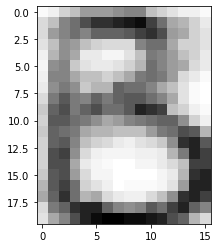

In [84]:
p_B = pcd[:,1].reshape((16,20))
plt.imshow(p_B.T,  cmap='Greys')

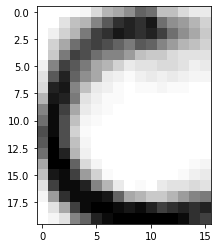

In [85]:
p_C = pcd[:,2].reshape((16,20))
plt.imshow(p_C.T,  cmap='Greys')

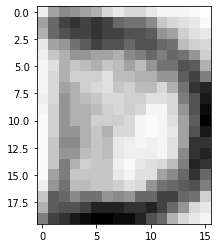

In [86]:
p_D = pcd[:,3].reshape((16,20))
plt.imshow(p_D.T,  cmap='Greys')

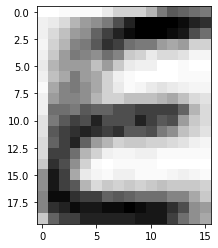

In [87]:
p_E = pcd[:,4].reshape((16,20))
plt.imshow(p_E.T,  cmap='Greys')